In [500]:
import cv2
from scipy import interpolate
%matplotlib inline

In [463]:
dat = cv2.imread('fig_cov_l1l2_maps.png', -1)

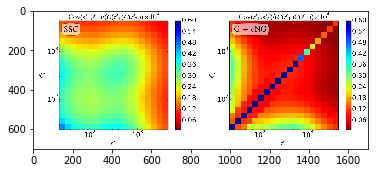

In [464]:
ax = plt.imshow(dat)

In [465]:
lower_x = 139
lower_y =  55
upper_x = 679
upper_y = 594

In [466]:
cov_fine = dat[lower_y : upper_y, lower_x : upper_x]

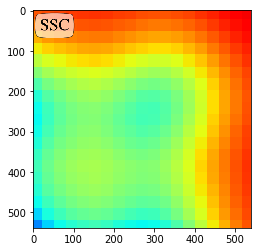

In [471]:
ax = plt.imshow(cov_fine, cmap=cm.jet)

In [474]:
import scipy.cluster.vq as scv
import matplotlib.cm as cm
def colormap2arr(arr,cmap,N=100):    
    # http://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values/3722674#3722674
    gradient=cmap(np.linspace(0,1.0,N)) #[:, 0:3]

    # Reshape arr to something like (240*240, 4), all the 4-tuples in a long list...
    arr2=arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2]))

    # Use vector quantization to shift the values in arr2 to the nearest point in
    # the code book (gradient).
    code,dist=scv.vq(arr2,gradient)

    # code is an array of length arr2 (240*240), holding the code book index for
    # each observation. (arr2 are the "observations".)
    # Scale the values so they are from 0 to 1.
    values=code.astype('float')/gradient.shape[0]

    # Reshape values back to (240,240)
    values=values.reshape(arr.shape[0],arr.shape[1])
    values=values[::-1]
    return values

In [481]:
cov_sc = colormap2arr(cov_fine, cm.jet, N=300)
#cov_sc = cov_fine

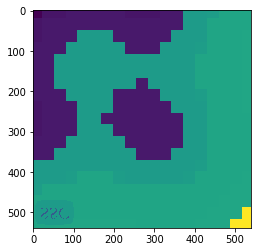

In [482]:
ax = plt.imshow(cov_sc)

In [483]:
npix = 19

In [484]:
n = upper_x - lower_x

In [485]:
step = int(n / npix)

In [486]:
cov = cov_sc[0:n:step,0:n:step]

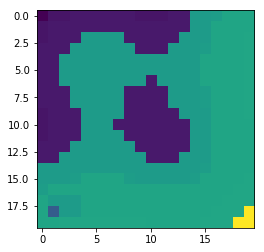

In [487]:
plt.imshow(cov)

In [488]:
x_leg = 730
lower_y_leg = 54 + 10
upper_y_leg = 590 - 10
n_leg = upper_y_leg - lower_y_leg

In [489]:
leg_fine = dat[lower_y_leg : upper_y_leg, (x_leg-5):(x_leg+15)]

In [571]:
leg_sc = colormap2arr(leg_fine, cm.jet, N=50)
#leg_sc = leg_fine

In [572]:
step = 70
leg = leg_sc[0:n_leg:step, :]

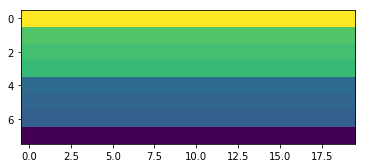

In [573]:
plt.imshow(leg)

In [576]:
leg0 = leg[:,0]

array([0.86, 0.66, 0.64, 0.62, 0.38, 0.36, 0.34, 0.12])

In [577]:
v0 = 0
v1 = 0.6
v = np.linspace(v0, v1, len(leg0))
leg_interp = interpolate.InterpolatedUnivariateSpline(leg0[::-1], v)

In [579]:
leg_interp(0.8)

array(0.77460219)

Text(0,0.5,'leg0[::-1]')

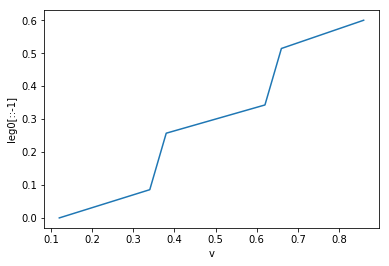

In [581]:
plt.plot(leg0[::-1], v)
plt.xlabel('v')
plt.ylabel('leg0[::-1]')

In [518]:
leg0

array([0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87,
       0.87, 0.87, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65,
       0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.64, 0.64, 0.64, 0.64,
       0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.63,
       0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63,
       0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63,
       0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.38, 0.38, 0.38, 0.38, 0.38,
       0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.37, 0.37, 0.37, 0.37, 0.37,
       0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.